In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

In [3]:
input_file = "C:/thaiduong/SocialNetwork/movie_dataset.csv"  # Thay đường dẫn đúng với file của bạn
data = pd.read_csv(input_file)
# Convert 'Cast' and 'Genre' to lists
data["Cast"] = data["Cast"].apply(lambda x: str(x).split(", "))
data["Genre"] = data["Genre"].apply(lambda x: str(x).split(", "))

# Remove director's name from 'Cast' column if it exists
data["Cast"] = data.apply(
    lambda row: [actor for actor in row["Cast"] if actor != row["Director"]], axis=1
)
data.head(3)

,Movie Title,Tomatometer,Popcornmeter,Director,Producer,Screenwriter,Distributor,Production Co,Rating,Genre,Original Language,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Sound Mix,Aspect Ratio,Cast
0,John Wick,86%,81%,Chad Stahelski,"Basil Iwanyk, Mike Witherill, David Leitch, Ev...",Derek Kolstad,Lionsgate Films,"87eleven, Defynite Films, Thunder Road Pictures",R (Language|Brief Drug Use|Strong Bloody Viole...,"[Action, Mystery & Thriller]",English,"Oct 24, 2014, Wide",7-Jun-16,$43.0M,1h 41m,"Dolby Digital, Datasat, Dolby Atmos",Digital 2.39:1,"[Keanu Reeves, Michael Nyqvist, Alfie Allen, W..."
1,Red Army,92%,85%,Gabe Polsky,Gabe Polsky,Gabe Polsky,Sony Pictures Classics,Gabriel Polsky Productions,PG (Thematic Material|Language),[Documentary],English,"Jan 23, 2015, Limited",30-Nov-16,$728.7K,1h 25m,NaN,NaN,"[Scotty Bowman, Viacheslav Fetisov, Anatoli Ka..."
2,Roman Holiday,96%,93%,William Wyler,William Wyler,"Dalton Trumbo, Ian McLellan Hunter, John Dighton",Paramount Pictures,Paramount Pictures,NaN,"[Romance, Comedy]",English,"Aug 27, 1953, Original",6-Jun-14,NaN,1h 59m,Mono,NaN,"[Gregory Peck, Audrey Hepburn, Eddie Albert, T..."


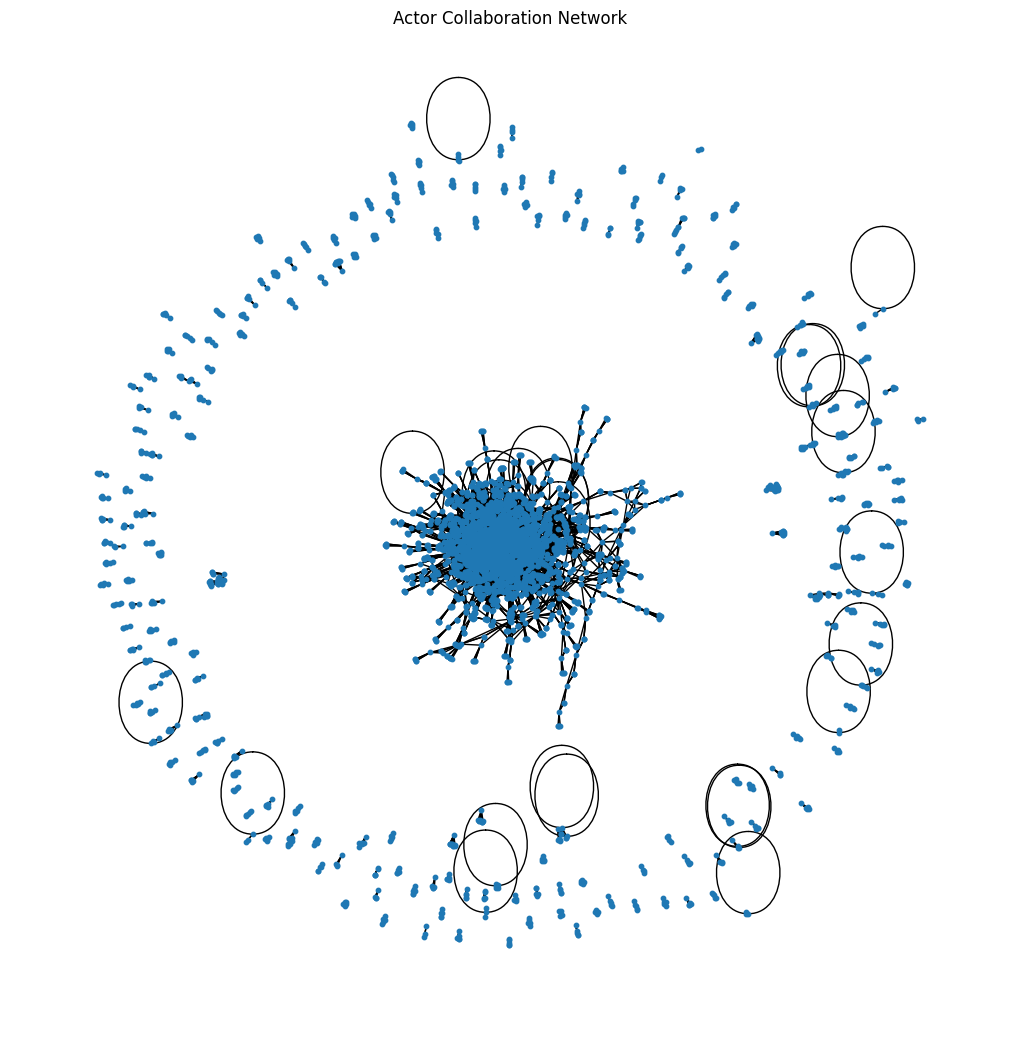

In [4]:
# Tạo một đồ thị không hướng (undirected graph)
actor_graph = nx.Graph()

# Thêm các nút (diễn viên) và cạnh (nếu họ cùng xuất hiện trong một phim)
for cast_list in data["Cast"]:
    for i, actor1 in enumerate(cast_list):
        for actor2 in cast_list[i + 1 :]:
            actor_graph.add_edge(actor1, actor2)

# Vẽ đồ thị (nếu kích thước không quá lớn)
plt.figure(figsize=(10, 10))
nx.draw(actor_graph, with_labels=False, node_size=10)
plt.title("Actor Collaboration Network")
plt.show()

In [5]:
# Degree Centrality
degree_centrality = nx.degree_centrality(actor_graph)
top_actors = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 most connected actors:", top_actors)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(actor_graph)
top_betweenness = sorted(
    betweenness_centrality.items(), key=lambda x: x[1], reverse=True
)[:10]
print("Top 10 influential actors by betweenness:", top_betweenness)

Top 10 most connected actors: [('Tom Hanks', 0.012239583333333333), ('Ralph Fiennes', 0.01015625), ('Matt Damon', 0.01015625), ('Christian Bale', 0.00859375), ('Timothée Chalamet', 0.00859375), ('Russell Crowe', 0.008333333333333333), ('Robert De Niro', 0.008333333333333333), ('Dennis Quaid', 0.008333333333333333), ('J.K. Simmons', 0.008072916666666666), ('Will Ferrell', 0.008072916666666666)]
Top 10 influential actors by betweenness: [('Cary Grant', 0.029888777670758628), ('James Stewart', 0.028832223394232394), ('Marlon Brando', 0.026536667084091956), ('Jamie Lee Curtis', 0.025992748718116465), ('Harrison Ford', 0.023464106690253946), ('Janet Leigh', 0.02334190231136054), ('Matt Damon', 0.0230177305144463), ('Jack Warden', 0.02156149847183719), ('Robert Duvall', 0.01851128078848652), ('Frank Sinatra', 0.018475447671824907)]


In [7]:
communities = community.louvain_communities(actor_graph)
print(f"Number of communities: {len(communities)}")

Number of communities: 241


In [8]:
# Độ dày mạng lưới (Density)
density = nx.density(actor_graph)
print(f"Network Density: {density}")

# Khoảng cách ngắn nhất trung bình
avg_shortest_path = nx.average_shortest_path_length(actor_graph)
print(f"Average Shortest Path Length: {avg_shortest_path}")

Network Density: 0.001448461772107958


NetworkXError: Graph is not connected.

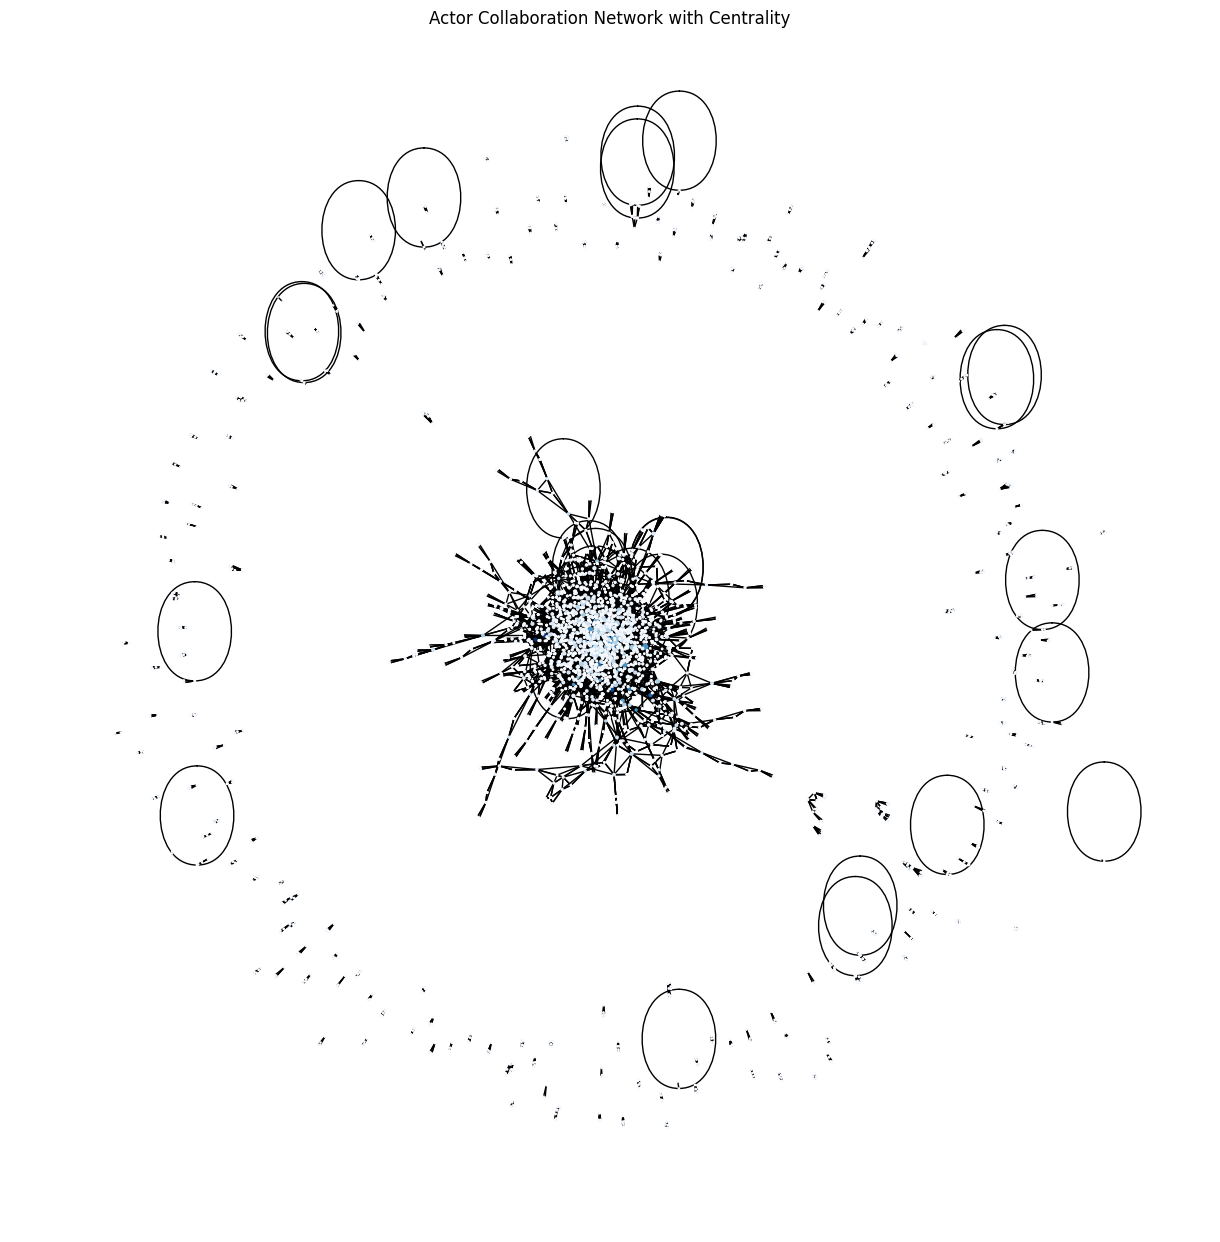

In [9]:
# Màu và kích thước nút dựa trên centrality
node_sizes = [v * 1000 for v in degree_centrality.values()]
node_colors = [v for v in betweenness_centrality.values()]

plt.figure(figsize=(12, 12))
nx.draw(
    actor_graph,
    with_labels=False,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.Blues,
)
plt.title("Actor Collaboration Network with Centrality")
plt.show()

In [10]:
# Kiểm tra số lượng thành phần liên thông (connected components)
num_components = nx.number_connected_components(actor_graph)
print(f"Số lượng thành phần liên thông: {num_components}")

Số lượng thành phần liên thông: 211


In [11]:
# Tìm thành phần liên thông lớn nhất
largest_component = max(nx.connected_components(actor_graph), key=len)

# Trích xuất thành phần liên thông lớn nhất
subgraph = actor_graph.subgraph(largest_component).copy()

# Thông tin về thành phần lớn nhất
print(f"Số nút trong thành phần lớn nhất: {subgraph.number_of_nodes()}")
print(f"Số cạnh trong thành phần lớn nhất: {subgraph.number_of_edges()}")

Số nút trong thành phần lớn nhất: 2724
Số cạnh trong thành phần lớn nhất: 8416


In [12]:
# Loại bỏ các thành phần nhỏ hơn ngưỡng
min_size = 10
large_components = [
    c for c in nx.connected_components(actor_graph) if len(c) >= min_size
]

# Tạo đồ thị mới chỉ chứa các thành phần lớn
filtered_graph = actor_graph.subgraph(
    [node for component in large_components for node in component]
).copy()

print(f"Số nút sau khi lọc: {filtered_graph.number_of_nodes()}")
print(f"Số cạnh sau khi lọc: {filtered_graph.number_of_edges()}")

Số nút sau khi lọc: 2811
Số cạnh sau khi lọc: 8628


In [13]:
from networkx.algorithms.community import louvain_communities

# Chạy Louvain trên thành phần lớn nhất
communities = louvain_communities(subgraph)
print(f"Số lượng cụm: {len(communities)}")

Số lượng cụm: 36
